In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor, plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

%matplotlib inline

In [2]:
boston = pd.read_csv('C:/Users/aochavez/OneDrive - deacero.com/Documentos/DT Activities/Modelado/data/Boston.csv').drop('Unnamed: 14',axis=1)

X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston[['MEDV']]

In [3]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #aleatorizar los datos
                                                   random_state= 1) 

## Comparacion de modelos

In [22]:
#KNN

knn = KNeighborsRegressor().fit(X_train,y_train).predict(X_test).flatten()

In [23]:
#LinearR
lr = LinearRegression().fit(X_train,y_train).predict(X_test).flatten()

In [9]:
lasso = Lasso().fit(X_train,y_train).predict(X_test).flatten()

In [10]:
ridge = Ridge().fit(X_train,y_train).predict(X_test).flatten()

In [11]:
en = ElasticNet().fit(X_train,y_train).predict(X_test).flatten()

In [12]:
dt = DecisionTreeRegressor().fit(X_train,y_train).predict(X_test).flatten()

In [13]:
rf = RandomForestRegressor().fit(X_train,y_train).predict(X_test).flatten()

C:\Users\aochavez\AppData\Local\Temp\ipykernel_3928\186571289.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor().fit(X_train,y_train).predict(X_test).flatten()


In [16]:
#XGBoost

xgboost = XGBRegressor().fit(X_train,y_train).predict(X_test).flatten()

In [24]:
outputs = pd.DataFrame(data=[knn,lr,lasso,ridge,en,dt,rf,xgboost]).T
outputs.columns=['knn','lr','lasso','ridge','en','dt','rf','xgboost']
outputs.head()

,knn,lr,lasso,ridge,en,dt,rf,xgboost
0,30.46,32.655032,30.798187,32.511398,31.348467,33.0,30.392,30.359884
1,30.70,28.093495,28.618170,28.265232,28.679029,33.0,27.212,27.026636
2,21.72,18.029018,17.964730,17.528444,17.886279,22.5,20.162,19.176161
3,26.34,21.476716,23.055233,21.330290,22.641323,18.6,20.538,21.448114
4,30.34,18.825439,24.371706,19.680651,23.889703,16.1,19.836,20.703493


In [18]:
from sklearn.metrics import r2_score

In [25]:
scores = []

for i in outputs.columns:
    r2 = r2_score(y_test,outputs[i])
    scores.append(r2)

print(scores)

[0.5401612153026705, 0.7634174432138501, 0.6399927356461497, 0.7655800611077147, 0.6662534357446654, 0.8108218734375611, 0.9122136924312481, 0.9085331557145866]


In [26]:
scores = pd.DataFrame(data=scores).T
scores.columns=['knn','lr','lasso','ridge','en','dt','rf','xgboost']
scores

,knn,lr,lasso,ridge,en,dt,rf,xgboost
0,0.540161,0.763417,0.639993,0.76558,0.666253,0.810822,0.912214,0.908533


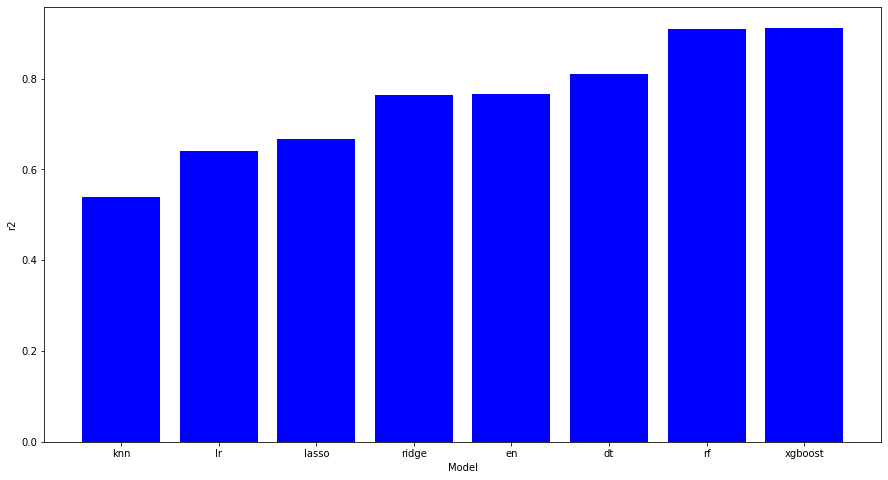

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(scores.columns,sorted(scores.T[0]), color='blue')
plt.ylabel('r2')
plt.xlabel('Model')
plt.show()

In [29]:
def gs_best(params,model,model_name):
    gs=GridSearchCV(model(), params, cv=5, n_jobs=1, verbose=1)
    gs.fit(X_train,y_train)
    best=model(**gs.best_params_).fit(X_train,y_train)
    y_hat=best.predict(X_test)
    r2=r2_score(y_test,y_hat)

    return best, r2

In [30]:
knn_params={'n_neighbors':[3,5,7,9], 'metric':['manhattan', 'euclidean'], 'weights':['uniform', 'distance']}
lr_params={}
lasso_params={'alpha':[1,100,1000,10000]}
ridge_params={'alpha':[1,100,1000,10000]}
en_params={'max_iter':[100000], 'selection':['cyclic', 'random']}
dt_params= {'max_depth':[3,4,5]}
rf_params={'n_estimators':[2,4,6,8]}
xgboost_params={'max_depth':[4,5], 'n_estimators':[10,20,30], 'learning_rate':[0.3,0.03]}

In [31]:
(model,r2_knn) = gs_best(knn_params,KNeighborsRegressor,'KNN')
print('R2 de KNN:', r2_knn)
(model,r2_lr) = gs_best(lr_params,LinearRegression,'LR')
print('R2 de LR:', r2_lr)
(model,r2_lasso) = gs_best(lasso_params,Lasso,'LASSO')
print('R2 de LASSO:', r2_lasso)
(model,r2_ridge) = gs_best(ridge_params,Ridge,'RIDGE')
print('R2 de RIDGE:', r2_ridge)
(model,r2_en) = gs_best(en_params,ElasticNet,'EN')
print('R2 de EN:', r2_en)
(model,r2_dt) = gs_best(dt_params,DecisionTreeRegressor,'DT')
print('R2 de DT:', r2_dt)
(model,r2_rf) = gs_best(rf_params,RandomForestRegressor,'RF')
print('R2 de RF:', r2_rf)
(model,r2_xgb) = gs_best(xgboost_params,XGBRegressor,'XGB')
print('R2 de XGB:', r2_xgb)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
R2 de KNN: 0.6508830800717474
Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2 de LR: 0.7634174432138501
Fitting 5 folds for each of 4 candidates, totalling 20 fits
R2 de LASSO: 0.6399927356461497
Fitting 5 folds for each of 4 candidates, totalling 20 fits
R2 de RIDGE: 0.7655800611077147
Fitting 5 folds for each of 2 candidates, totalling 10 fits
R2 de EN: 0.6662912927661083
Fitting 5 folds for each of 3 candidates, totalling 15 fits
R2 de DT: 0.8550736930450995
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\aochavez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\aochavez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\aochavez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\aochavez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column

R2 de RF: 0.8969271876134507
Fitting 5 folds for each of 12 candidates, totalling 60 fits
R2 de XGB: 0.9177082576000329


In [32]:
outputs_gs = pd.DataFrame(data=[r2_knn,r2_lr,r2_lasso,r2_ridge,r2_en,r2_dt,r2_rf,r2_xgb]).T
outputs_gs.columns=['knn','lr','lasso','ridge','en','dt','rf','xgboost']
outputs_gs.head()

,knn,lr,lasso,ridge,en,dt,rf,xgboost
0,0.650883,0.763417,0.639993,0.76558,0.666291,0.855074,0.896927,0.917708


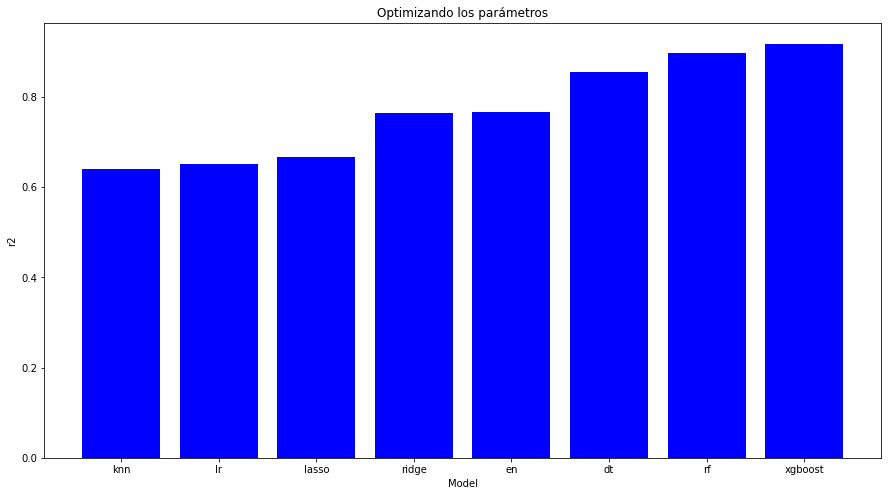

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(outputs_gs.columns,sorted(outputs_gs.T[0]), color='blue')
plt.ylabel('r2')
plt.xlabel('Model')
plt.title('Optimizando los parámetros')
plt.show()

In [35]:
xgboost_params={'max_depth':[1], 'n_estimators':[10,20,30], 'learning_rate':[0.3,0.03]}
(model,r2_xgb) = gs_best(xgboost_params,XGBRegressor,'XGB')
print('R2 de XGB:', r2_xgb)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
R2 de XGB: 0.8608704355144288


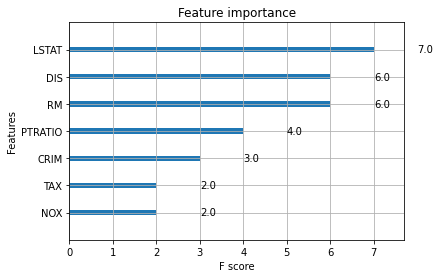

In [36]:
feature_importance = xgb.plot_importance(model)

In [37]:
xgboost_params={'max_depth':[4,5], 'n_estimators':[10,20,30], 'learning_rate':[0.3,0.03]}
(model,r2_xgb) = gs_best(xgboost_params,XGBRegressor,'XGB')


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [38]:
xgboost_params={'max_depth':[5], 'learning_rate':[0.3]} 
(model,r2_xgb) = gs_best(xgboost_params,XGBRegressor,'XGB')
# No se utiliza el parámetro n_estimators ya que se utilizará el 30 en num_boost_round dentro de xg_reg

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [39]:
xgboost_params={'max_depth':5, 'learning_rate':0.3} 
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [40]:
xg_reg = xgb.train(params=xgboost_params, dtrain=data_dmatrix, num_boost_round=10)

In [41]:
from sklearn.tree import plot_tree
import graphviz

In [43]:
r2_xgb = []
for i in range(1,101):
    yhat = XGBRegressor(n_estimators=i).fit(X_train,y_train).predict(X_test).flatten()
    r2 = r2_score(y_test,yhat)
    r2= None if r2 < 0 else r2
    r2_xgb.append(r2)

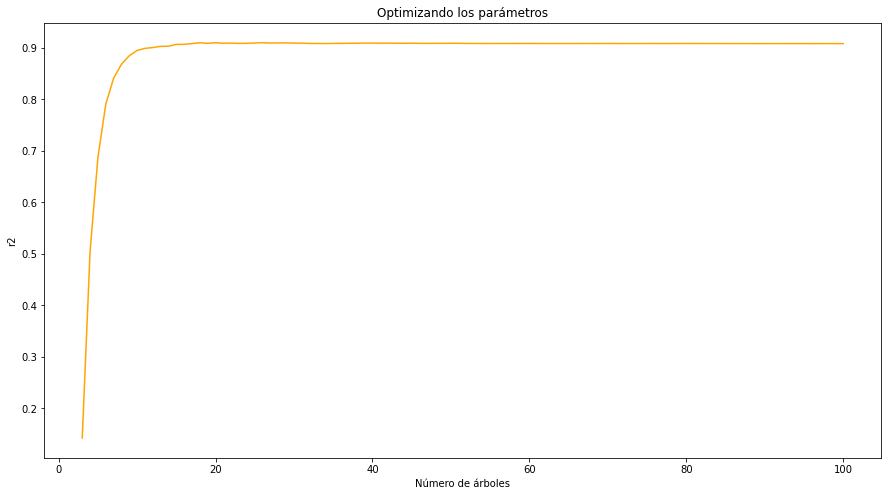

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(range(1,101),r2_xgb,color='orange')
plt.ylabel('r2')
plt.xlabel('Número de árboles')
plt.title('Optimizando los parámetros')
plt.show()